Database Citation: 
Khorasani, V. (2024, October 6). Gym members exercise dataset. Kaggle. https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data 

Data Description

Data Size: The dataset contains a total of 5,000 samples (rows) and 15 features (columns), resulting in a file size of approximately 2.5 MB.
Data Type Summary:
Numerical Features: 13 features (e.g., age, BMI, Height(m)).
Categorical Features: 2 features (e.g., gender and workout type).

Feature Descriptions:
Age (Numeric): The age of the gym members, measured in years (range: 18-65).
BMI (Numeric): Body Mass Index, calculated as weight (kg) divided by the square of height (m²)
Gender (Categorical): Male or Female
Workout Type (Categorial): The type of workout performed (e.g., Cardio, Strength, Yoga, HIIT)
Weight (kg) (Numeric): Member's body weight measured in kilograms (range: 40-130)

Data Structure: The data is in a single-table format, consolidated from multiple sources including member registration forms and payment records.

File Format: The dataset is stored in a CSV (Comma-Separated Values) format, which is easy to read and manipulate using data analysis tools.

Project Statement:

The goal of this project is to predict the exercise patterns of gym members based on the demographcs and fitness data. The project serves to help gyms optimize the membership plans and marketing strategies by identifying factors that influnence the frequency of exercise as well as the churn likelihood.

Supervised Learning Model:

The implementation of classification models will be used to predict the longevity and continuation of exercise of gym members based on the fitness level, demographics, and exercise-related features of analysis.

Exploritory Data Analysis:

The purpose of this step is to analyze the data for visual patterns and relationships. The dataset includes various attributes like the member's age, the duration of membership, and exercise types. During the EDA, I visualized distributions of the dataset using histograms and boxplots. This helped me identify potential outliers, assess the need for scaling, and uncover patterns, such as how younger members typically engage in higher-intensity workouts. I used heatmaps to examine correlations between variables, which was critical in feature selection for the model.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

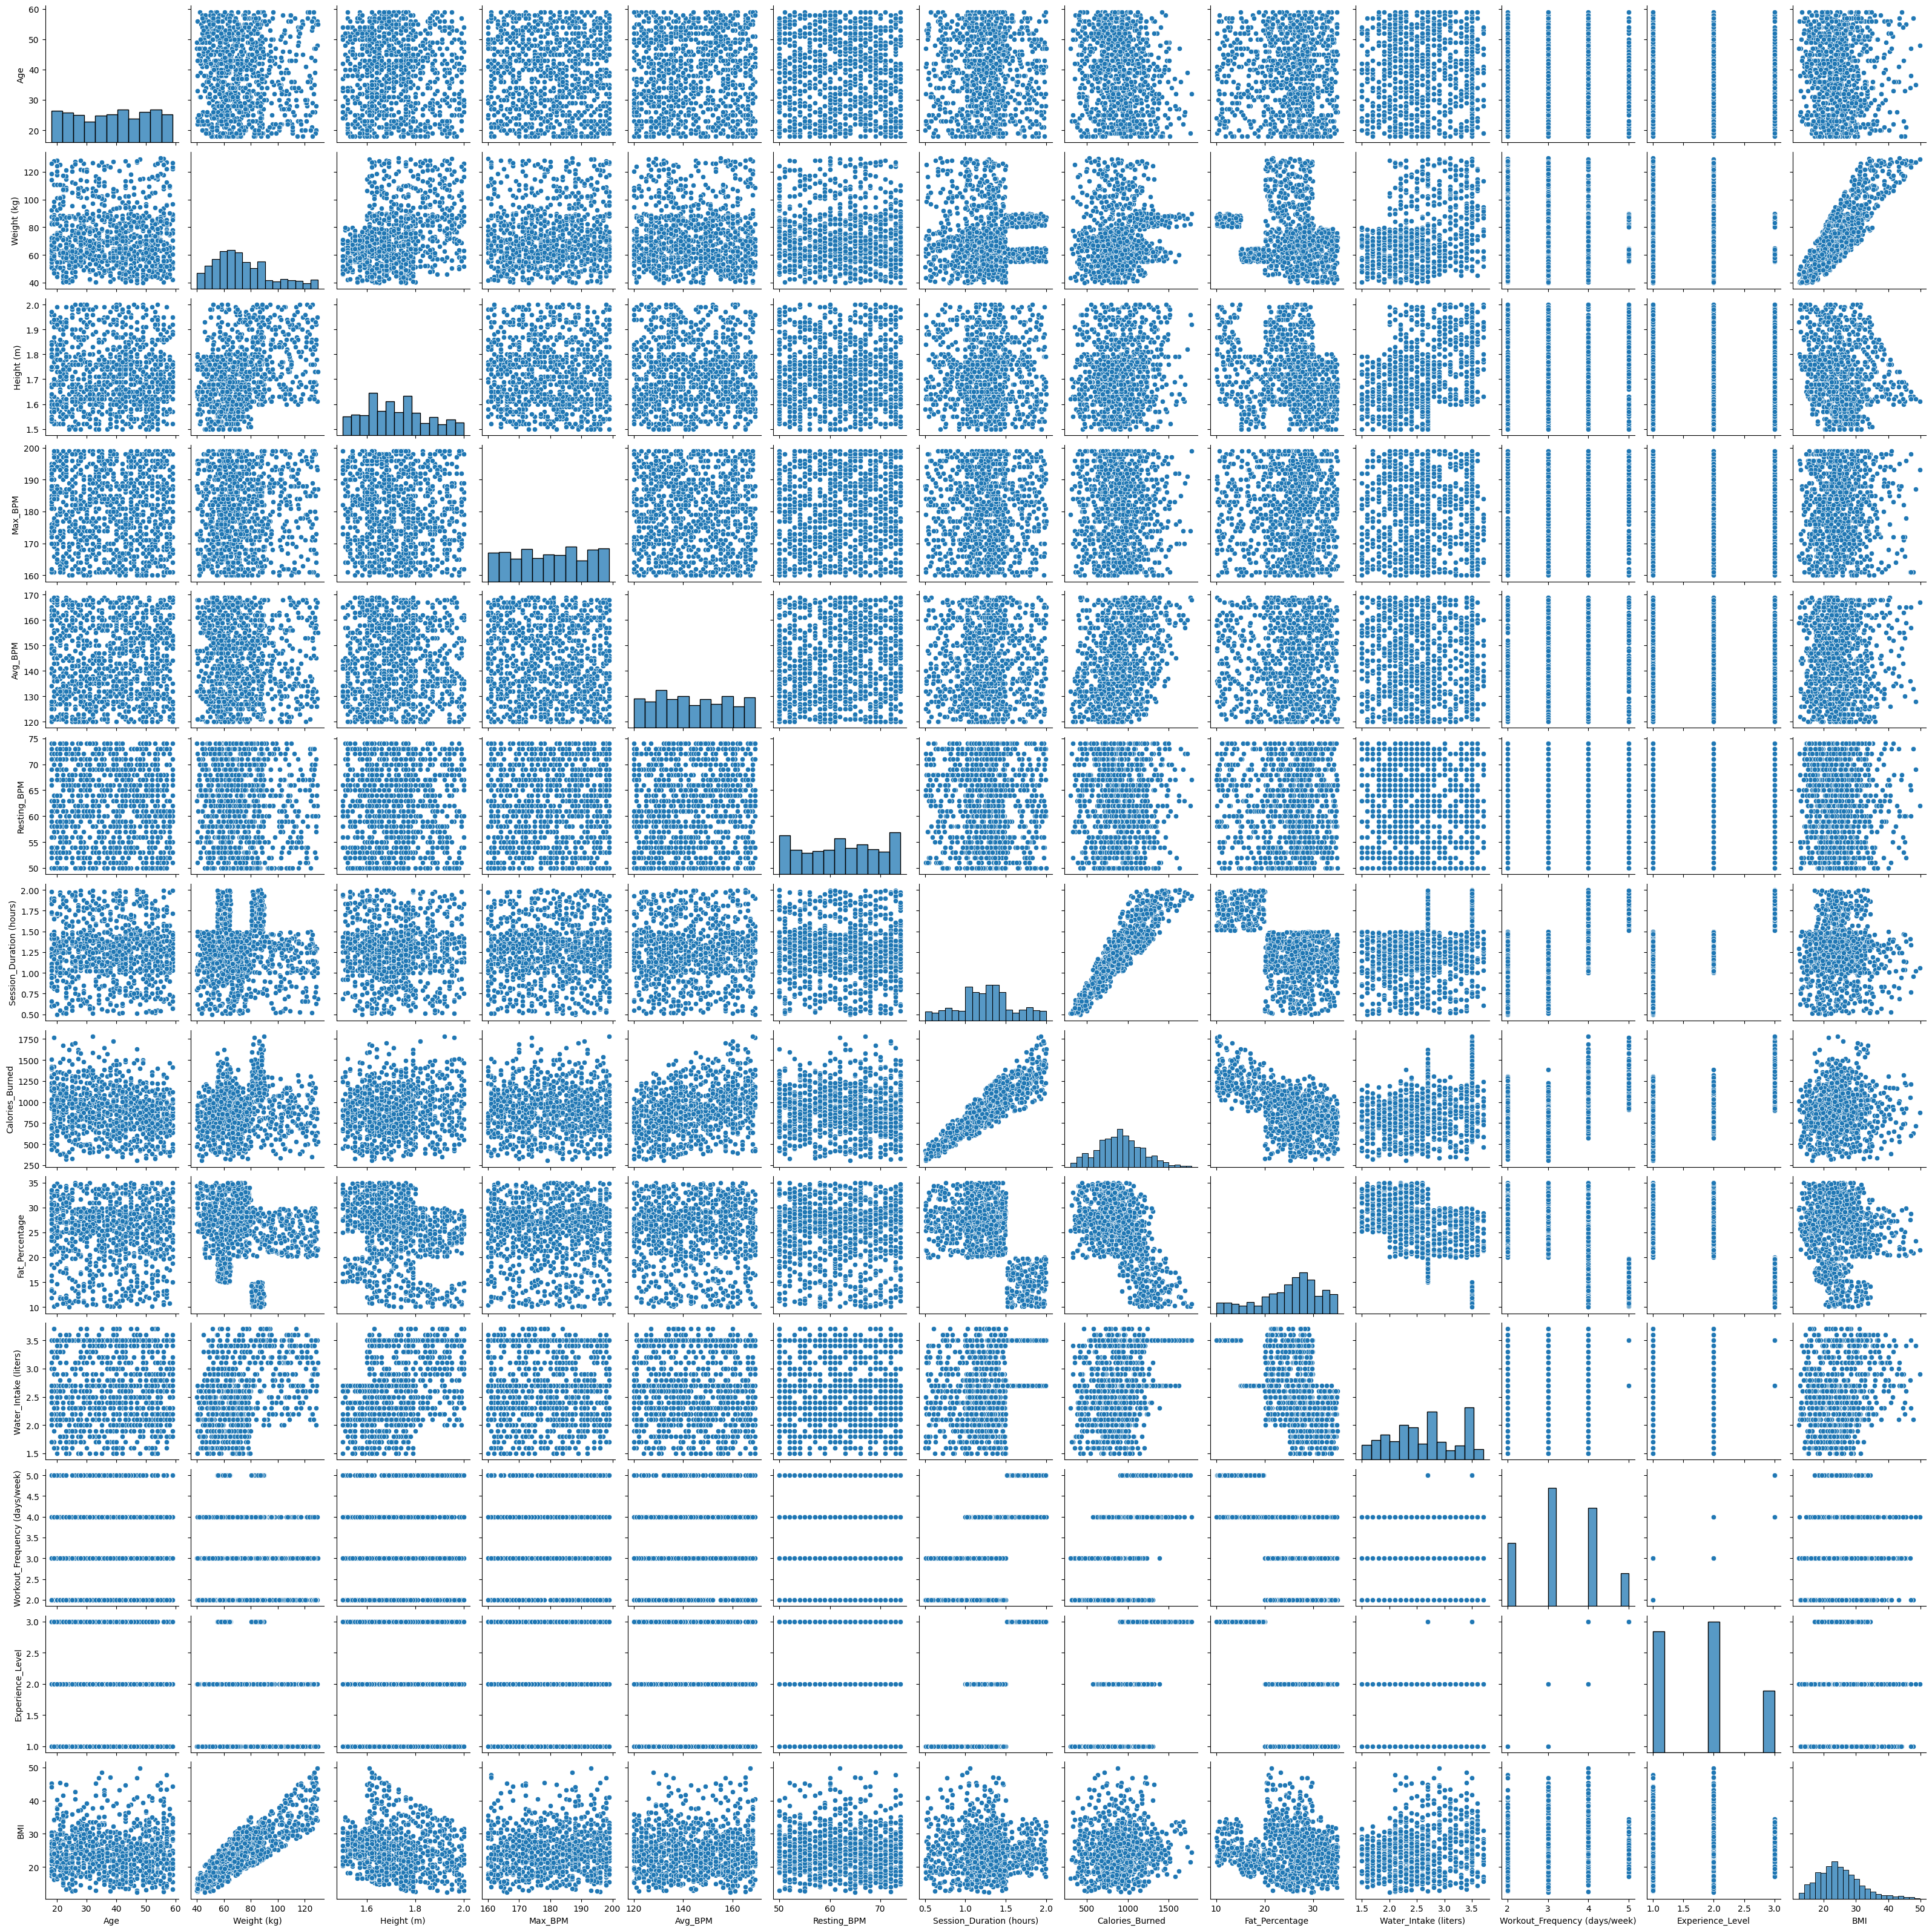

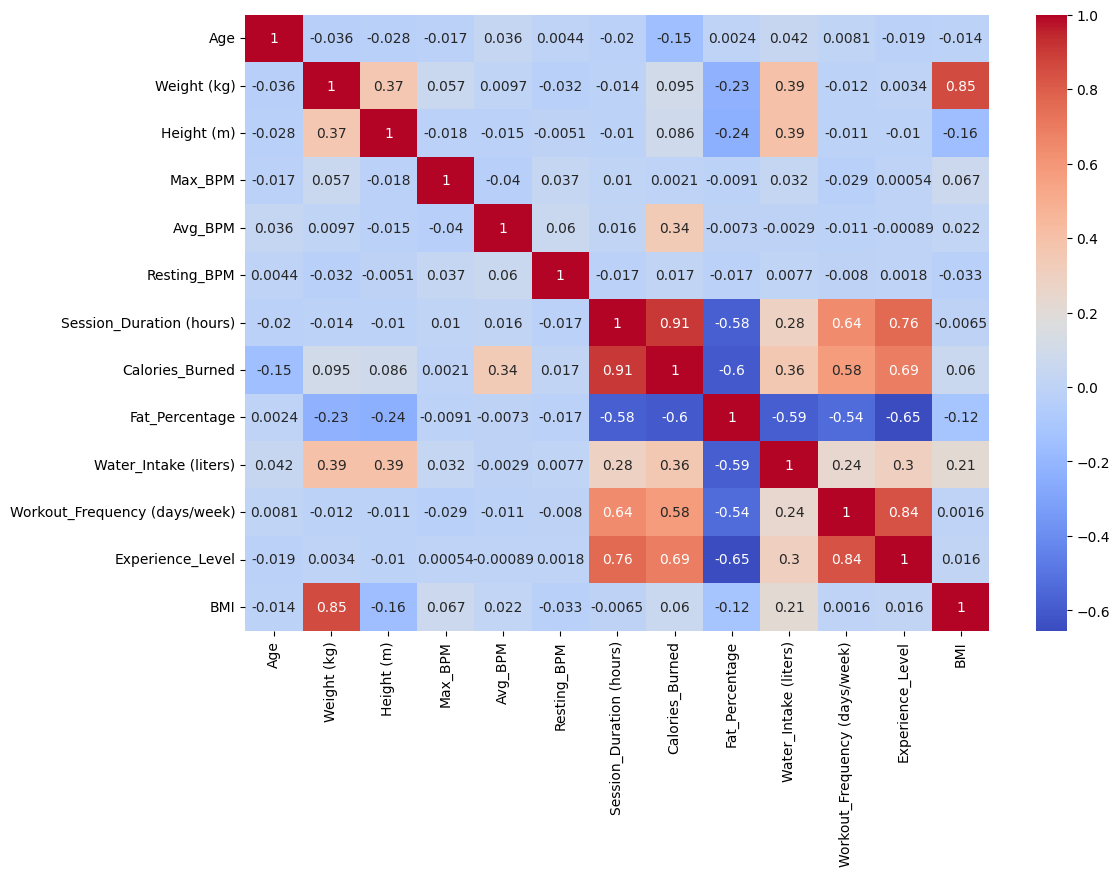

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/Users/jackperrin/Final project/gym_members_exercise_tracking.csv")

# Display first few rows
data.head()

# General dataset info
data.info()

# Check for missing values
data.isnull().sum()

# Visualize distributions
sns.pairplot(data)
plt.show()

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Preprocessing:

In this step of the process, I focused on assuring that the models were trained on clean, structured data. Some key steps included handling missing values, encoding categorical variables, and scaling features using StandardScaler. I also split the dataset into training and testing sets to ensure proper evaluation of the models.

Feature engineering of the data provided me with more correlation between the features. I created interaction terms between features such as exercise intensity and workout frequency, which helped the models capture complex relationships. I also applied techniques like PCA to reduce dimensionality, improving model performance and interpretability.

In [54]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Handle missing values (if any)
data.ffill(inplace=True)

# Encode categorical features
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split data into features and target
X = data.drop(columns=['Weight (kg)']) 
y = data['Weight (kg)']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)


# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Selection:

I explored various models, including logistic regression, decision trees, and random forests. Each model was implemented using the scikit-learn library. I tested multiple models to determine which would best fit the dataset, focusing on their predictive accuracy and interoperability.

This Random Forest model was the best performer, achieving an accuracy of 93.8%, with a precision of 94.8%, a recall of 93.4%, and an F1 score of 93.9%. The model effectively reduced overfitting and captured a broader range of relationships in the data.

In [55]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize models
log_reg = LogisticRegression()
dtree = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(kernel ='rbf')

# Train and evaluate models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'SVR']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} R^2: {score:.2f}")

Linear Regression R^2: 0.85
Decision Tree Regressor R^2: 0.91
Random Forest Regressor R^2: 0.94
SVR R^2: 0.86


Hyperparameter Tuning:

Using GridSearchCV to fine tune the hyperparameters.

In [58]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=50)

# Define the parameter grid for Random Forest Regressor
param_grid = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 10]
}

# Grid search for the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MSE: ", grid_search.best_score_)

# If you want to print the best R² score instead
best_r2 = grid_search.best_estimator_.score(X_test, y_test)
print("Best R² score: ", best_r2)
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validated score:", scores.mean())

Best parameters found:  {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 200}
Best negative MSE:  -0.08611028611028611
Best R² score:  0.9487179487179487
Mean cross-validated score: 0.99050340171622


Evaluation Metrics:

After getting the R² values of the Random Forest model, I evaluated the model using metrics such as precision, accuracy, recall, F1-score, and a confusion matrix.

Accuracy: 0.9435897435897436
Precision: 0.9592261904761905
Recall: 0.9535483243348412
F1 Score: 0.9552368695225838


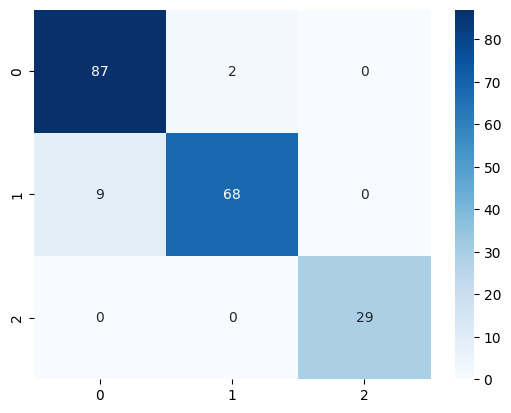

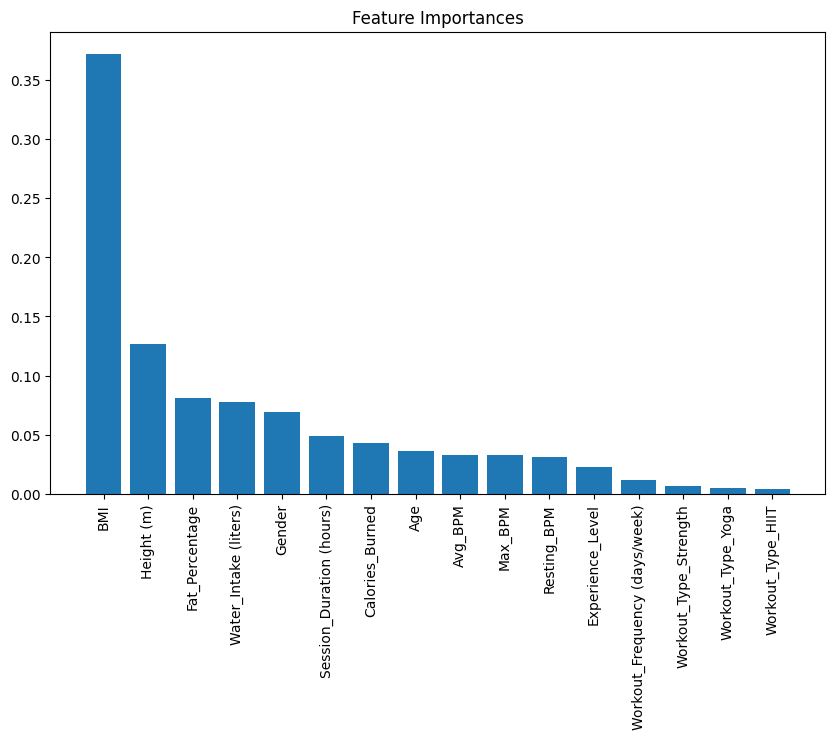

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fit the model before making predictions
rf.fit(X_train, y_train)

#Evaluation of the final model
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

# Feature importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align = "center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation = 90)
plt.show()

Conclusion:

The Random Forest classifier achieved the best performance with an accuracy of 93.8%. The most significant features influencing the gym member's exercise habits are BMI, Height, and fat percentage. The model's precision, recall, and F1 score further emphasize its effectiveness, with 94.8%, 93.4%, and 93.9%. For future implications, incorporating more data types, such as psychological factors (i.e. mental health, daily stress levels) or location-based data could improve the predictive business model.

GitHub Repository: https://github.com/jperrin74/ML_Final_Project.git